In [1]:
from sympy.solvers import solve
from sympy import Poly, Symbol
from sympy.solvers.inequalities import reduce_rational_inequalities
import numpy as np
import matplotlib.pyplot as plt 
from time import sleep
from IPython.display import clear_output


# Mixed Strategies in Games
So far we have dealt with choices over strategies as a selection over actions where a player selects the option with *100% certainty*
* Example: Matching Pennies Game. Players pick H or T secretly and reveal their choice simultaneously.

### Is it realistic for strategies to always be *pure*?
The simple answer is **not always**

Examples:
* In matching pennies, you might prefer to flip the coin

How might we incorporate the idea of a "flip of the coin" into our games?

![matchingpennies](matchingpennies.png)

## Definition: **Mixed Strategies**
 Given a set of players $I=\{1,\ldots,n\}$ with actions (aka pure strategies) $A_i$ available, a *mixed strategy* is a probability distributions $\sigma$ over the set of pure strategies.

 Example: Flipping the coin can be thought of as a probability distribution $\sigma=(s_H,s_T)=(0.5,0.5)$ where $p(H)=s_H$ and $p(T)=s_T$

## Expected Value of a Mixed Strategy
We can envision all strategies, including pure strategies, as mixed strategies.
* If you select Heads as a pure strategy, this is equivalent to having a mixed strategy $\sigma=(1,0)$

When we add in this element of randomization over outcomes, we can no longer look at the payoff as certain. Instead, we will only be able to consider the **expected value**, or the payoff that you could expect to get if you were to get on average if you played this game over and over. Imagine that we have a random variable X with outcomes (-1,1) and a probability distribution of (0.5,0.5). Then the expected value of X is
$$E(X)=0.5(-1)+0.5(1)=0$$

Now, we need to add in the complication of having an opponent. Imagine that we have two players with two possible actions each (i.e., matching pennies).
$$ A_1=(H,T)$$
$$ A_2 = (H,T)$$

Let $\sigma_1=(s_{11},s_{12})$ be the mixed strategy for player 1, and $\sigma_2=(s_{21},s_{22})$ for player 2. Let's consider the expected value of pure strategies:

$$E_1(H,\sigma_2)=(1)(s_{21})+(-1)(s_{22})$$
$$E_1(T,\sigma_2)=(-1)(s_{21})+(1)(s_{22})$$

If $\sigma_2=(0.5,0.5)$ the $E_1(H)=E_2(T)=0$


### Calculation:

Notation:

    sik = prob player i picks outcome k
    oiab = outcome to player i if player 1 picks a and player 2 picks b
    Expi_a = expected value to player i of selecting pure strategy a

In [2]:
s11 = 0.5
s12 = 1-s11
s21 = 0.5
s22 = 1-s21

o1HH = 1 
o2HH = -1
o1HT = -1
o2HT = 1
o1TH = -1
o2TH = 1
o1TT = 1
o2TT = -1

In [3]:
Exp1_H = o1HH*s21 + o1HT*s22 #expected value for player 1 of playing stategy 1
Exp1_H 

0.0

In [4]:
Exp1_T = o1TH*s21 + o1TT*s22 #expected value for player 1 of playing stategy 2
Exp1_T 

0.0

In [5]:
Exp2_H = o2HH*s11 + o2TH*s12 #expected value for player 2 of playing stategy 1
Exp2_H 

0.0

In [6]:
Exp2_T = o2HT*s11 + o2TT*s12 #expected value for player 2 of playing stategy 2
Exp2_T 

0.0

**All the expected values are zero! What if we changed $\sigma$??**

## The overall expected payoffs is 
$$ E_1(\sigma_1,\sigma_2) = s_{11}E_1(H)+s_{12}E_1(T)$$
$$ E_2(\sigma_1,\sigma_2) = s_{21}E_2(H)+s_{22}E_2(T)$$

## Best responses

Assume:
$$\sigma_1 = (p,1-p)$$
$$\sigma_2 = (q,1-q)$$

Then the pure strategy expected values are:
$$E_1(H,\sigma_2) = 1q+(-1)(1-q) = 2q-1$$
$$E_1(T,\sigma_2) = (-1)q+1(1-q) = 1-2q$$
$$E_2(\sigma_1,H) = (-1)p+1(1-p) = 1-2p$$
$$E_2(\sigma_1,T) = 1p+(-1)(1-p) = 2p-1$$

#### Best response for player 1:
1. Player 1 picks H: $p=(1,0)$ if 
$$E_1(H,\sigma_2)>E_1(T,\sigma_2)$$
$$ 2q-1>1-2q$$
$$q>1/2$$
2. Player 1 picks T: $p=(0,1)$ if 
$$E_1(H,\sigma_2)<E_1(T,\sigma_2)$$
$$ 2q-1<1-2q$$
$$q<1/2$$
3. Player 1 picks H: $\{p:0\leq p \leq 1\}$ if 
$$E_1(H,\sigma_2)=E_1(T,\sigma_2)$$
$$ 2q-1=1-2q$$
$$q=1/2$$

#### Best response for player 2:
1. Player 1 picks H: $q=(1,0)$ if 
$$E_2(\sigma_1,H)>E_2(\sigma_1,T)$$
$$ 1-2p>2p-1$$
$$p<1/2$$
2. Player 1 picks T: $q=(0,1)$ if 
$$E_2(\sigma_1,H)<E_2(\sigma_1,T)$$
$$ 1-2p<2p-1$$
$$p>1/2$$
3. Player 1 picks H: $\{q:0\leq q \leq 1\}$ if 
$$E_2(\sigma_1,H)=E_2(\sigma_1,T)$$
$$ 1-2p=2p-1$$
$$p=1/2$$

In [7]:
q = Symbol('q')
p = Symbol('p')
ex11 =o1HH*q + o1HT*(1-q)
ex12 = o1TH*q + o1TT*(1-q)
ex21 =o2HH*p + o2TH*(1-p)
ex22 = o2HT*p + o2TT*(1-p)

ind1 = solve(ex11 - ex12, q, rational=None)
ind1 = ind1[0]
ind1=float(ind1)
ind2 = solve(ex21 - ex22, p, rational=None)
ind2 = ind2[0]
ind2=float(ind2)


Heads1 = reduce_rational_inequalities([[ex11 > ex12]], q)
Tails1 = reduce_rational_inequalities([[ex11 < ex12]], q)
Heads2 = reduce_rational_inequalities([[ex21 > ex22]], p)
Tails2 = reduce_rational_inequalities([[ex21 < ex22]], p)
print("For the case where O1HH=" +str(o1HH))
print("If Person 1 prefers H: q = " + str(Heads1) )
print("If Person 1 prefers T: q = " + str(Tails1) )
print("If Person 1 prefers H: q = " + str(Heads2) )
print("If Person 1 prefers T: q = " + str(Tails2) )
print("The MSNE is: " + "(" + str(ind1)+","+str(ind2) +")")

For the case where O1HH=1
If Person 1 prefers H: q = (1/2 < q) & (q < oo)
If Person 1 prefers T: q = (-oo < q) & (q < 1/2)
If Person 1 prefers H: q = (-oo < p) & (p < 1/2)
If Person 1 prefers T: q = (1/2 < p) & (p < oo)
The MSNE is: (0.5,0.5)


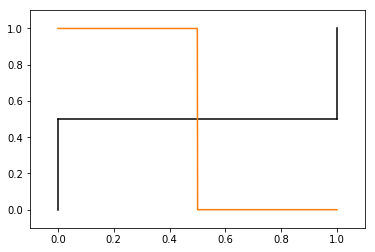

In [8]:
x=np.linspace(0, 1, 1000)
y1=np.piecewise(x, [x <= ind1, x >= ind1], [0, 1])
y2=np.piecewise(x, [x <= ind1, x >= ind1], [1,0])
plt.axis([-0.1,1.1,-0.10,1.1])
plt.plot((0, 0), (0, ind2), 'k-')
plt.plot(0,ind2,'-')
plt.plot((0, 1),(ind2,ind2), 'k-')
plt.plot((1, 1),(ind2,1), 'k-')
plt.plot(x,y2,'-')
plt.show()

**Note**: *This visualization works only for the matching pennies game*

## Let's change the payoffs and see how that affects the payoffs!

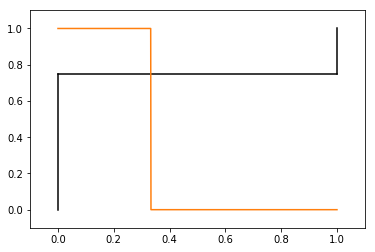

For the case where O1HH=0
If Person 1 prefers H: q = (1/3 < q) & (q < oo)
If Person 1 prefers T: q = (-oo < q) & (q < 1/3)
If Person 2 prefers H: p = (-oo < p) & (p < 3/4)
If Person 2 prefers T: p = (3/4 < p) & (p < oo)
The MSNE is: (0.3333333333333333,0.75)


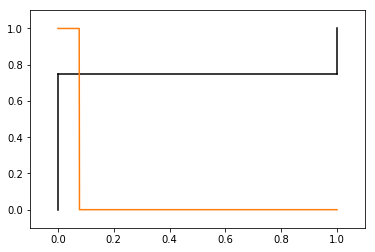

For the case where O1HH=10
If Person 1 prefers H: q = (1/13 < q) & (q < oo)
If Person 1 prefers T: q = (-oo < q) & (q < 1/13)
If Person 2 prefers H: p = (-oo < p) & (p < 3/4)
If Person 2 prefers T: p = (3/4 < p) & (p < oo)
The MSNE is: (0.07692307692307693,0.75)


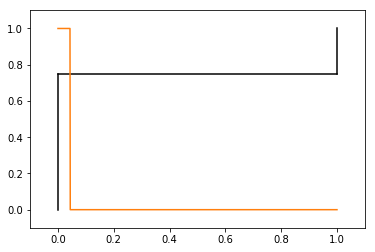

For the case where O1HH=20
If Person 1 prefers H: q = (1/23 < q) & (q < oo)
If Person 1 prefers T: q = (-oo < q) & (q < 1/23)
If Person 2 prefers H: p = (-oo < p) & (p < 3/4)
If Person 2 prefers T: p = (3/4 < p) & (p < oo)
The MSNE is: (0.043478260869565216,0.75)


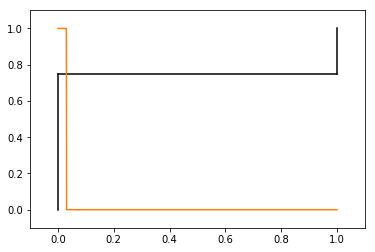

For the case where O1HH=30
If Person 1 prefers H: q = (1/33 < q) & (q < oo)
If Person 1 prefers T: q = (-oo < q) & (q < 1/33)
If Person 2 prefers H: p = (-oo < p) & (p < 3/4)
If Person 2 prefers T: p = (3/4 < p) & (p < oo)
The MSNE is: (0.030303030303030304,0.75)


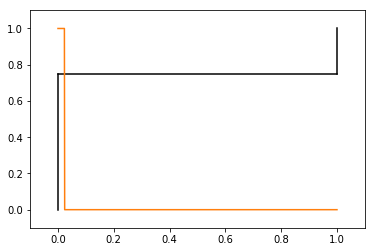

For the case where O1HH=40
If Person 1 prefers H: q = (1/43 < q) & (q < oo)
If Person 1 prefers T: q = (-oo < q) & (q < 1/43)
If Person 2 prefers H: p = (-oo < p) & (p < 3/4)
If Person 2 prefers T: p = (3/4 < p) & (p < oo)
The MSNE is: (0.023255813953488372,0.75)


In [9]:

paymax = 50 # change to highest payment for HH to player 1
delta = 10 # change to increase payment by delta units
for i in range(0,paymax,delta): 
    o1HH = i
    o2HH = 0
    o1HT = 0
    o2HT = 1
    o1TH = -2
    o2TH = 2
    o1TT = 1
    o2TT = -1


    # Leave the rest alone
    q = Symbol('q')
    p = Symbol('p')
    ex11 =o1HH*q + o1HT*(1-q)
    ex12 = o1TH*q + o1TT*(1-q)
    ex21 =o2HH*p + o2TH*(1-p)
    ex22 = o2HT*p + o2TT*(1-p)

    ind1 = solve(ex11 - ex12, q, rational=None)
    ind1 = ind1[0]
    ind1=float(ind1)
    ind2 = solve(ex21 - ex22, p, rational=None)
    ind2 = ind2[0]
    ind2=float(ind2)


    Heads1 = reduce_rational_inequalities([[ex11 > ex12]], q)
    Tails1 = reduce_rational_inequalities([[ex11 < ex12]], q)
    Heads2 = reduce_rational_inequalities([[ex21 > ex22]], p)
    Tails2 = reduce_rational_inequalities([[ex21 < ex22]], p)
    
    x=np.linspace(0, 1, 1000)
    y1=np.piecewise(x, [x <= ind1, x >= ind1], [0, 1])
    y2=np.piecewise(x, [x <= ind1, x >= ind1], [1,0])
    plt.axis([-0.1,1.1,-0.10,1.1])
    plt.plot((0, 0), (0, ind2), 'k-')
    plt.plot(0,ind2,'-')
    plt.plot((0, 1),(ind2,ind2), 'k-')
    plt.plot((1, 1),(ind2,1), 'k-')
    plt.plot(x,y2,'-')
    plt.show()
    
    print("For the case where O1HH=" +str(o1HH))
    print("If Person 1 prefers H: q = " + str(Heads1) )
    print("If Person 1 prefers T: q = " + str(Tails1) )
    print("If Person 2 prefers H: p = " + str(Heads2) )
    print("If Person 2 prefers T: p = " + str(Tails2) )
    print("The MSNE is: " + "(" + str(ind1)+","+str(ind2) +")")
    sleep(3) # seconds        


# Thus, the matching pennies game has a single MSNE where the players end up indifferent between H and T (depending on payoffs)